
# Fourier Transform

In this notebook, we will be exploring the notion of Fourier transform with respect to signals. Let us define a simple signal made up of a superposition of waves


In [1]:
import numpy as np

#three waves
freqs = np.array([0.5, 1, 2.0]) #Hz - cycles per second
amplitudes = np.array([1.0, 0.5, 1.5])
time_to_plot = 2 # second
sample_rate = 100 # samples per second
num_samples = sample_rate * time_to_plot

#create each wave for each member of lists freqs and amplitudes
t = np.linspace(0, time_to_plot, num_samples)
waves = np.array([amplitudes * np.sin(freqs * i * 2*np.pi) for i in t]) #2D array of the waves
print(waves.shape)

#create the signal as a superposition of the waves
signal = np.sum(waves, axis=1)
print(signal.shape)

(200, 3)
(200,)


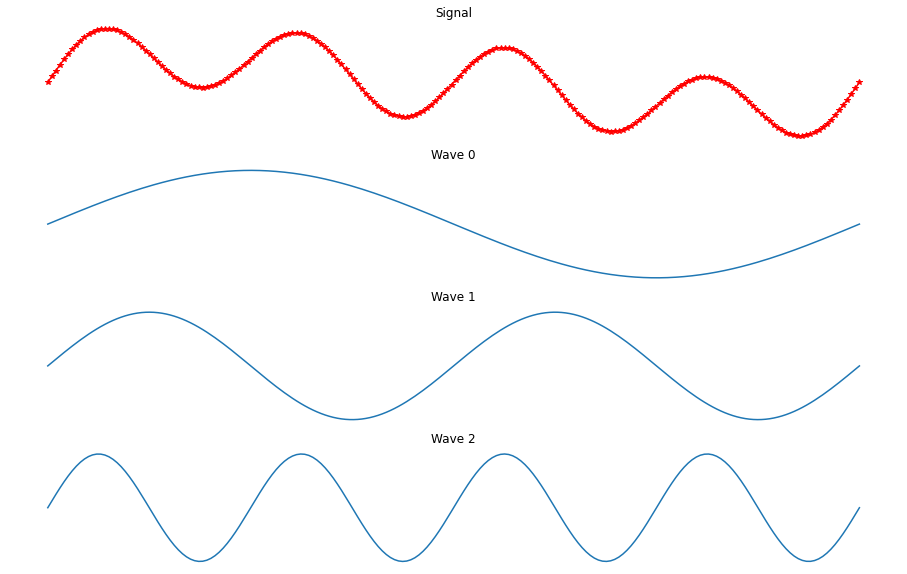

In [2]:
#plot
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(16, 10))

ax[0].plot(t, signal, '*-r')
ax[0].axis('off')
ax[0].set_title('Signal')
for number, wave in enumerate(waves.T): #transpose to allow traversing columns instead of rows
    ax[number+1].plot(t, wave, '-')
    ax[number+1].axis('off')
    ax[number+1].set_title('Wave '+str(number))

plt.show()

Can we develop a search method that can find the all the possible finite Fourier frequences in a signal? Let us examine an important property of sine waves before we develop this search or decomposition method called orthogonality. When two signals or vectors $\mathbf{e}_j$ and $\mathbf{e}_k$ are orthogonal, then
$$\mathbf{e}_j\cdot\mathbf{e}_k = \delta_{jk}$$
where
$$ \delta_{jk} = \begin{cases}
0 &\text{if } i \neq j,   \\
1 &\text{if } i=j.   \end{cases} $$
In other words, an orthogonal set of signals are those that are perpendicular to all other signals except itself. Let's test that this is so with the waves we wave created

In [3]:
#compute the inner product between two waves
#innerWaves = np.linalg.inner(waves[:,0], waves[:,1]) #inner requires numpy 1.13 +
innerWaves1 = np.sum(waves[:, 0]*waves[:,1])
print(innerWaves1)
innerWaves2 = np.sum(waves[:,0]*waves[:,0])
print(innerWaves2)

4.163336342344337e-17
99.5


So what if we just did an inner product with all possible frequencies to test if a signal possesses that frequency? This is the essence of the Fourier transform! Let's test this idea on our example signal.

In [4]:
#create a generic set of frequencies to test signals with
N = 8 #number of freqs to test with
#N = sample_rate #number of freqs to test with
fMax = 4 #Hz
freqs = np.linspace(0.5, fMax, N) #Hz - cycles per second
print("freqs:", freqs)
amplitudes = np.ones(N) #unit amplitudes

harmonics = np.array([amplitudes * np.sin(freqs * i * 2*np.pi) for i in t]) #2D array of the waves
print(harmonics.shape)

freqs: [0.5 1.  1.5 2.  2.5 3.  3.5 4. ]
(200, 8)


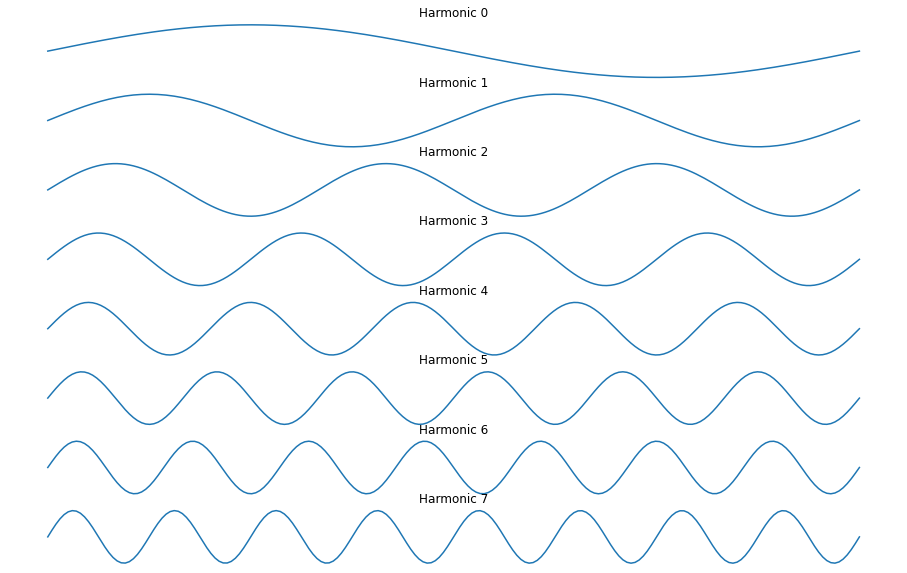

In [5]:
#plot
fig, ax = plt.subplots(nrows=N, ncols=1, figsize=(16, 10))

for number, harmonic in enumerate(harmonics.T): #transpose to allow traversing columns instead of rows
    ax[number].plot(t, harmonic, '-')
    ax[number].axis('off')
    ax[number].set_title('Harmonic '+str(number))

plt.show()

Now let's do the search or decomposition of the signal using the harmonics (or test waves) we've created by computing the inner product to the signal

In [6]:
spectrumList = []
for harmonic in harmonics.T: #transpose to allow traversing columns instead of rows
    innerWaves = np.sum(signal*harmonic) #inner product
    spectrumList.append(innerWaves) #create list of the resulting inner products
    
spectrum = np.array(spectrumList) # the list is the spectrum of the signal!
print(spectrum)

[ 9.95000000e+01  4.97500000e+01  7.49400542e-15  1.49250000e+02
 -9.21485110e-15 -3.10862447e-15 -7.99360578e-15 -1.80966353e-14]


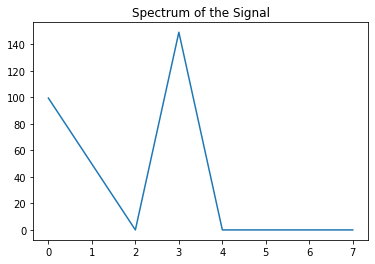

In [7]:
#plot
f = np.arange(0,N)
plt.plot(f, spectrum, '-')
plt.title('Spectrum of the Signal')

plt.show()

It seems we have identified the individual waves (as well as their frequencies) that composed the signal. We have actually just coded up a simple version of the discrete Fourier transform (DFT)! Well, nearly but close!